# 边缘检测

##2.1 边缘
边缘是像素明显变化的区域，并且具有丰富的语义信息，主要用于物体识别，几何、视角变换。从梯度的角度来讲，梯度大的地方就是边缘。边缘就是像素值函数快速变化的区域，也就是一阶导数的极值区域![images](../images/12/22.png)
边缘提取的时候，先进行高斯去噪，在使用一阶导数来获取极值，这是因为一阶导数对噪声很敏感(域值法、01对比法)![images](../images/12/23.png)
- f是原始信号，可以看到在1000的时候，应该是一个边缘，其它地方的波动都是噪声
- g是高斯卷积，用来去噪声
- $f*g$就是使用高斯去噪的结果，发现噪声没有了，波动也有所缓和

在数学中，与变化率有关的就是导数。如果灰度图像的像素是连续的，那么我们可以在原图像熵分别对x方向和y方向求导数$G_x=\frac{\partial{G}}{\partial{x}}, G_y=\frac{\partial{G}}{\partial{y}}$，那么梯度向量就是$|G_{xy}|=\sqrt{Gx^2+Gy^2}$，角度方向是$G_{xy}=arctan(\frac{G_y}{G_x})$，梯度向量的大小包含了x和y两个方向的边缘信息

但是实际上，图像矩阵是离散的，连续函数求变化率用的是导数，而离散函数求变化率用的是差分(用相邻的两个书的差来表示变化率)。其中x和y方向的差分就是$G_x(n,y)=G(x,y)-G(n-1,y), G_y(x,n)=G(x,n)-G(x,n-1)$，实际计算图像导数时，我们是通过原图像和一个算子进行卷积来完成的，这种方法是求图像的近似导数。

###2.1.1 Prewitt算子
- 水平梯度![images](../images/12/10.png)
- 垂直梯度![images](../images/12/11.png)

Prewitt算子虽然能检测出图像边缘，但是检测结果较为粗糙，还带有大量的噪声,对噪声有抑制作用，抑制噪声的原理是通过像素平均，但是像素平均相当于对图像的低通滤波，所以Prewitt算子对边缘的定位不如Roberts算子

###2.1.2 roberts算子
边缘定位准，但是对噪声敏感。适用于边缘明显且噪声较少的图像分割。Roberts边缘检测算子是一种利用局部差分算子寻找边缘的算子,Robert算子图像处理后结果边缘不是很平滑。经分析，由于Robert算子通常会在图像边缘附近的区域内产生较宽的响应，故采用上述算子检测的边缘图像常需做细化处理，边缘定位的精度不是很高

###2.1.3 Sobel算子
- 水平梯度![images](../images/12/12.png)
- 垂直梯度![images](../images/12/13.png)

Sobel算子和Prewitt算子都是加权平均，但是Sobel算子认为，邻域的像素对当前像素产生的影响不是等价的，所以距离不同的像素具有不同的权值，对算子结果产生的影响也不同。一般来说，距离越远，产生的影响越小

###2.1.4 Laplacian算子(二阶梯度)
增强边缘信息
公式$\Delta{f}=\frac{\partial^2{f}}{\partial{x}^2}+\frac{\partial^2{f}}{\partial{y}^2}$
- 团块检测：周边高于或低于中心点
- 边缘检测：像素值快速变化的区域

常用的有四种卷积核
- 1D
$$\begin{bmatrix}
1&-2&1
\end{bmatrix}$$
- 2D 4邻域
$$\begin{bmatrix}
0&1&0\\
1&-4&1\\
0&1&0
\end{bmatrix}$$
- 2D 8邻域
$$\begin{bmatrix}
1&1&1\\
1&-8&1\\
1&1&1
\end{bmatrix}$$
- $5*5$
$$\begin{bmatrix}
0&0&1&0&0\\
0&1&2&1&0\\
1&2&-16&2&1\\
0&1&2&1&0\\
0&0&1&0&0\\
\end{bmatrix}$$

它们的特点都是中心的值与周围的值的和是0
![images](../images/12/14.png)

这是二阶微分算子。其具有各向同性，即与坐标轴方向无关，坐标轴旋转后梯度结果不变。但是，其对噪声比较敏感，所以，图像一般先经过平滑处理，因为平滑处理也是用模板进行的，所以，通常的分割算法都是把Laplacian算子和平滑算子结合起来生成一个新的模板。
Laplacian算子一般不以其原始形式用于边缘检测，因为其作为一个二阶导数，Laplacian算子对噪声具有无法接受的敏感性；同时其幅值产生算边缘，这是复杂的分割不希望有的结果；最后Laplacian算子不能检测边缘的方向；

所以Laplacian在分割中所起的作用包括：
- 利用它的零交叉性质进行边缘定位；
- 确定一个像素是在一条边缘暗的一面还是亮的一面；

一般使用的是高斯型拉普拉斯算子（Laplacian of a Gaussian,LoG)，由于二阶导数是线性运算，利用LoG卷积一幅图像与首先使用高斯型平滑函数卷积改图像，然后计算所得结果的拉普拉斯是一样的。所以在LoG公式中使用高斯函数的目的就是对图像进行平滑处理，使用Laplacian算子的目的是提供一幅用零交叉确定边缘位置的图像；图像的平滑处理减少了噪声的影响并且它的主要作用还是抵消由Laplacian算子的二阶导数引起的逐渐增加的噪声影响。

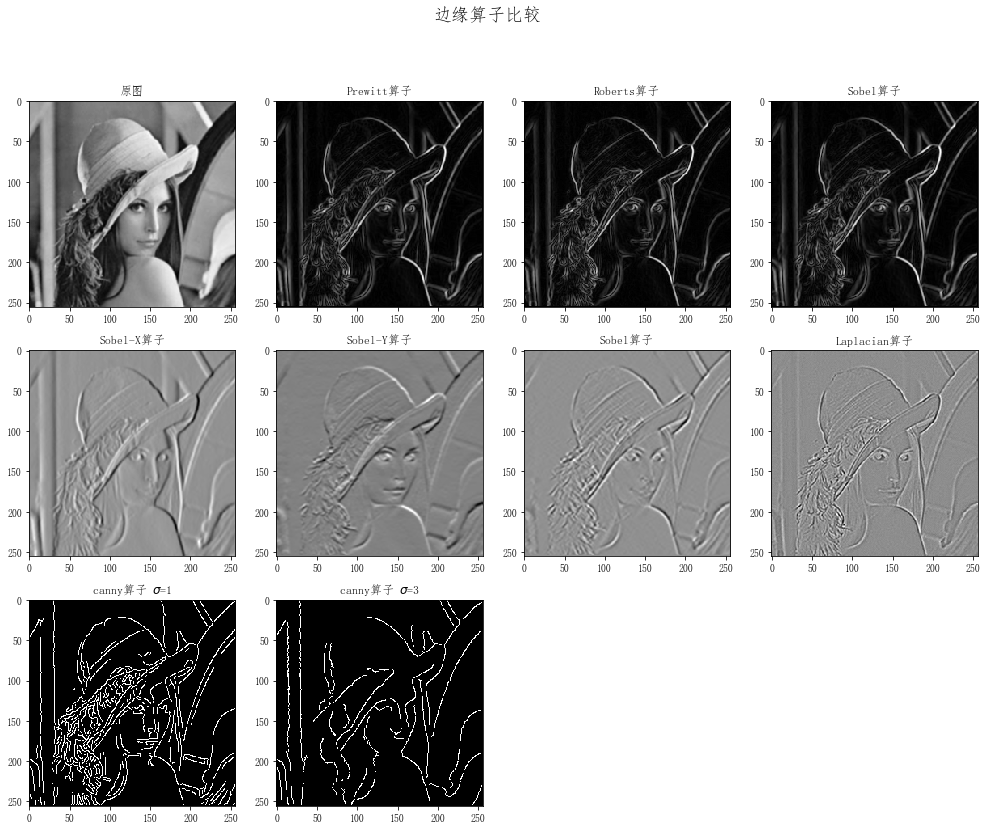

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters,feature
import matplotlib as mpl

# 打开图像并转化成灰度图像


mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题


plt.figure(figsize=(17,13), facecolor='w')

image = cv2.imread('images/12/Lena.png', cv2.IMREAD_GRAYSCALE)
image = cv2.GaussianBlur(image
                         ,(3,3),0)
row = 3
col = 4
plt.subplot(row,col,1)
plt.imshow(image,cmap=plt.cm.gray)
plt.title(u'原图')

edges = filters.prewitt(image)
plt.subplot(row,col,2)
plt.imshow(edges,cmap=plt.cm.gray)
plt.title(u'Prewitt算子')

edges = filters.roberts(image)
plt.subplot(row,col,3)
plt.imshow(edges,cmap=plt.cm.gray)
plt.title(u'Roberts算子')

edges = filters.sobel(image)
plt.subplot(row,col,4)
plt.imshow(edges,cmap=plt.cm.gray)
plt.title(u'Sobel算子')

edges = cv2.Sobel(image,cv2.CV_64F,1,0,ksize=5)
plt.subplot(row,col,5)
plt.imshow(edges,cmap=plt.cm.gray)
plt.title(u'Sobel-X算子')

edges = cv2.Sobel(image,cv2.CV_64F,0,1,ksize=5)
plt.subplot(row,col,6)
plt.imshow(edges,cmap=plt.cm.gray)
plt.title(u'Sobel-Y算子')

edges = cv2.Sobel(image,cv2.CV_64F,1,1,ksize=7)
plt.subplot(row,col,7)
plt.imshow(edges,cmap=plt.cm.gray)
plt.title(u'Sobel算子')

edges = cv2.Laplacian(image,cv2.CV_64F)
plt.subplot(row,col,8)
plt.imshow(edges,cmap=plt.cm.gray)
plt.title(u'Laplacian算子')

edges = feature.canny(image)
plt.subplot(row,col,9)
plt.imshow(edges,cmap=plt.cm.gray)
plt.title(u'canny算子 $\sigma$=1')

edges = feature.canny(image, sigma=3)
plt.subplot(row,col,10)
plt.imshow(edges,cmap=plt.cm.gray)
plt.title(u'canny算子 $\sigma$=3')

plt.suptitle(u'边缘算子比较', fontsize=18)
plt.show()